# [9660] Naive Bayes 1
Data file:
* sklearn: iris

In [9]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/20/24 13:37:31


### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Load data

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

### Examine data

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Display class distribution
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [10]:
# Check for missing values
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


### Prepare data for model training
Dependent variable (target): species

In [11]:
# Separate dependent and independent variables
X = df.drop("species", axis = 1)
y = df["species"]

In [12]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3, random_state=42)

### Train Gaussian Naive Bayes classifier

In [13]:
model = GaussianNB()
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [14]:
model.fit(X_train, y_train)

GaussianNB()

In [15]:
print(f'# features observed during fit: {model.n_features_in_}\n')
print(f'features observed during fit: \n{model.feature_names_in_}\n')
print(f'class labels observed during fit: {model.classes_}\n')
print(f'# training samples observed in each class: {model.class_count_}\n')
print(f'probability of each class: {model.class_prior_}\n')
print(f'variance of each feature per class: \n{model.var_}\n')
print(f'mean of each feature per class: \n{model.theta_}\n')

# features observed during fit: 4

features observed during fit: 
['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']

class labels observed during fit: [0 1 2]

# training samples observed in each class: [35. 35. 35.]

probability of each class: [0.33333333 0.33333333 0.33333333]

variance of each feature per class: 
[[0.10329796 0.17391021 0.02293878 0.00925715]
 [0.24078368 0.08558368 0.21147755 0.03564082]
 [0.42484898 0.11735511 0.32272653 0.06386939]]

mean of each feature per class: 
[[4.98857143 3.42571429 1.48571429 0.24      ]
 [5.94857143 2.73142857 4.23714286 1.30857143]
 [6.68285714 3.00857143 5.63142857 2.06857143]]



In [16]:
y_pred = model.predict(X_test)

### Evaluate Gaussian Naive Bayes model performance

In [17]:
print(f'Accuracy = {round(accuracy_score(y_test, y_pred)*100,2)}%')

Accuracy = 91.11%


In [18]:
print(f'{classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



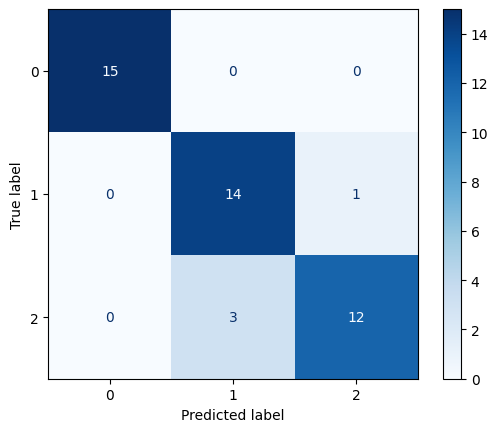

In [19]:
# Display confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()